# Replicating results from a study

## A typical aDNA study
Hajdinjak et al. 2021:
https://doi.org/10.1038/s41586-021-03335-3

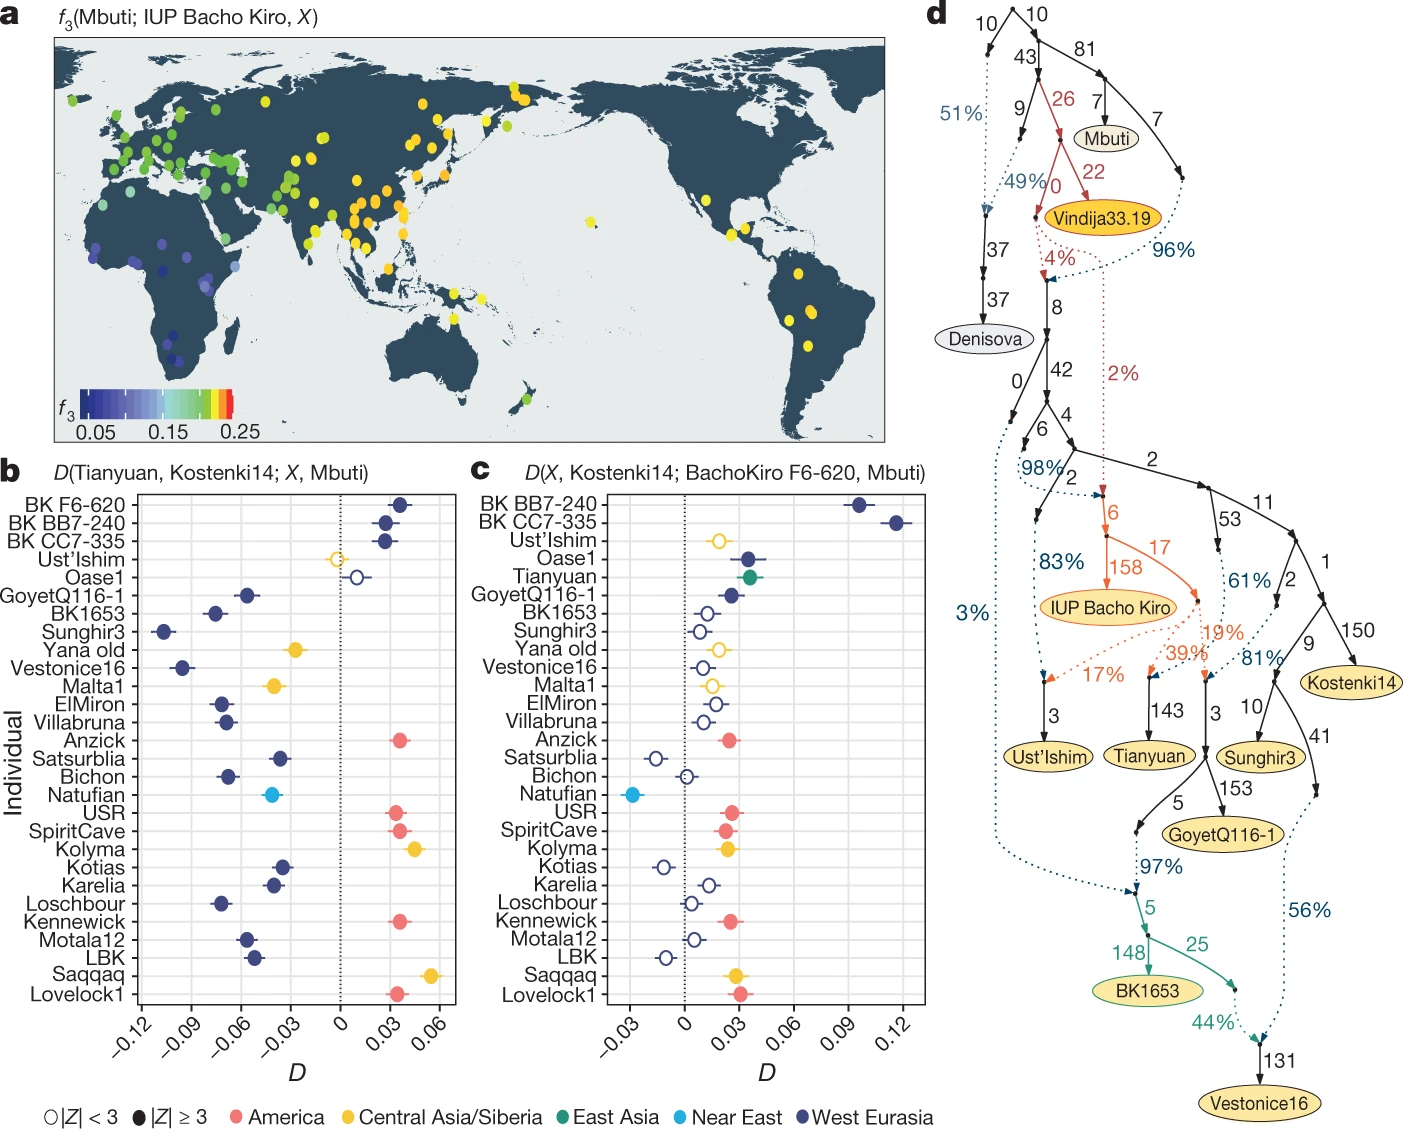

This is a study on ancient genomes from early modern humans in Western Eurasia, in order to put them into context of the broad history of Eurasia. As you see, it includes D/f-statistics and admixture graphs (and a lot of other things), so it is quite typical in the framework they use.

Hajdinjak and colleagues used D-statistics to investigate if some ancient/archaic individuals (X) shared more alleles with the eastern Tianyuan or western Kostenki14.

With this they wanted to see if those individuals contributed more towards modern East or West Eurasians.

```
D/f4(Tianyuan, Kostenki14; X, Mbuti) 
D(A, B; C, D) or f4(D, C; B, A)

D(Tianyuan, Kostenki14; X, Mbuti) 
D(Mbuti, X; Kostenki14, Tianyuan)

D/f4 > 0        X closer to Tianyuan than to Kostenki14
D/f4 < 0        X closer to Kostenki14 than to Tianyuan
```


## Calculate f4-stats

To do this, we need to calulate the proper statistics again for the right combination of individuals, starting from the original file:

```
extract_f2(pref="dataset",
    outdir="genos2",blgsize=500000,
    overwrite=T,maxmem=1000,
    pops=c("China_Tianyuan", "Russia_Kostenki14.SG","Mbuti.DG", "Russia_Ust_Ishim.DG","Romania_Oase","Belgium_UP_GoyetQ116_1", "Russia_Sunghir3.SG","Czech_Vestonice16"))

f2_blocks = f2_from_precomp("genos2")

f4table<-f4(f2_blocks,pop1="China_Tianyuan", pop2="Russia_Kostenki14.SG", pop3=c("Russia_Ust_Ishim.DG","Romania_Oase","Belgium_UP_GoyetQ116_1","Russia_Sunghir3.SG", "Czech_Vestonice16"), pop4="Mbuti.DG")
```

Let's plot them in the easiest possible plot that ggplot (a very common plotting package in R) has to offer:

```
dat<-data.frame(pop=f4table$pop3, fs=f4table$est,se=f4table$se)

png("f4_stats.png",600,400)
ggplot(dat, aes(y=pop, x=fs)) + geom_pointrange(aes(xmin=fs-se, xmax=fs+se))
dev.off()
```

When you compare this to panel b of above figure from the paper, you can see that the directions of values are quite similar, but these are f4-statistics, not D-statistics.

Of course, this most basic plot doesn't look as nice as a figure in a publication...



## D-statistics, as shown in the paper

So, let's go one step further and calculate the D-statistics, since this is of course also possible in admixtools.

```
dtable<-qpdstat("dataset",pop1="China_Tianyuan", pop2="Russia_Kostenki14.SG", pop3=c("Russia_Ust_Ishim.DG","Romania_Oase","Belgium_UP_GoyetQ116_1","Russia_Sunghir3.SG", "Czech_Vestonice16"), pop4="Mbuti.DG",f4mode=F)
```

Then, we can make a nice plot that has some similarity with the figure in the paper. For this, we have to define a bunch of things in ggplot:

```
dat<-data.frame(pop=dtable$pop3, fs=dtable$est,se=dtable$se,sig=ifelse(dtable$z<3&dtable$z>(-3),F,T))
dat$pop <- factor(dat$pop, levels = rev(dat$pop))

png("d_stats.png",600,400)
ggplot(dat, aes(y=pop, x=fs)) + geom_pointrange(aes(xmin=fs-se, xmax=fs+se,shape = factor(sig)),fatten=3,size=2,fill="white") + xlim(-0.12,0.06) + scale_shape_manual(values = c(21, 19)) + theme_bw() + theme(legend.position="none", axis.text=element_text(size=16),axis.title.x = element_text(size = 18),  axis.title.y = element_text(size = 18),plot.background = element_rect(fill = "white")) + labs(title="D(Tianyuan,Kostenki;X,Mbuti)",x ="D", y = "Individual") + geom_vline(xintercept=0,linetype=3)
dev.off()
```

As you can see, these are replicable results!